Emukit and Experimental Design
==============================

### [Neil D. Lawrence](http://inverseprobability.com)

### 2020-10-30

**Abstract**: In this lecture we introduce Emukit, a software framework
for decision programming via surrogage modelling and emulation. We’ll
then show an example of the use of the framework with experimental
design.

$$
\newcommand{\tk}[1]{}
\newcommand{\Amatrix}{\mathbf{A}}
\newcommand{\KL}[2]{\text{KL}\left( #1\,\|\,#2 \right)}
\newcommand{\Kaast}{\kernelMatrix_{\mathbf{ \ast}\mathbf{ \ast}}}
\newcommand{\Kastu}{\kernelMatrix_{\mathbf{ \ast} \inducingVector}}
\newcommand{\Kff}{\kernelMatrix_{\mappingFunctionVector \mappingFunctionVector}}
\newcommand{\Kfu}{\kernelMatrix_{\mappingFunctionVector \inducingVector}}
\newcommand{\Kuast}{\kernelMatrix_{\inducingVector \bf\ast}}
\newcommand{\Kuf}{\kernelMatrix_{\inducingVector \mappingFunctionVector}}
\newcommand{\Kuu}{\kernelMatrix_{\inducingVector \inducingVector}}
\newcommand{\Kuui}{\Kuu^{-1}}
\newcommand{\Qaast}{\mathbf{Q}_{\bf \ast \ast}}
\newcommand{\Qastf}{\mathbf{Q}_{\ast \mappingFunction}}
\newcommand{\Qfast}{\mathbf{Q}_{\mappingFunctionVector \bf \ast}}
\newcommand{\Qff}{\mathbf{Q}_{\mappingFunctionVector \mappingFunctionVector}}
\newcommand{\aMatrix}{\mathbf{A}}
\newcommand{\aScalar}{a}
\newcommand{\aVector}{\mathbf{a}}
\newcommand{\acceleration}{a}
\newcommand{\bMatrix}{\mathbf{B}}
\newcommand{\bScalar}{b}
\newcommand{\bVector}{\mathbf{b}}
\newcommand{\basisFunc}{\phi}
\newcommand{\basisFuncVector}{\boldsymbol{ \basisFunc}}
\newcommand{\basisFunction}{\phi}
\newcommand{\basisLocation}{\mu}
\newcommand{\basisMatrix}{\boldsymbol{ \Phi}}
\newcommand{\basisScalar}{\basisFunction}
\newcommand{\basisVector}{\boldsymbol{ \basisFunction}}
\newcommand{\activationFunction}{\phi}
\newcommand{\activationMatrix}{\boldsymbol{ \Phi}}
\newcommand{\activationScalar}{\basisFunction}
\newcommand{\activationVector}{\boldsymbol{ \basisFunction}}
\newcommand{\bigO}{\mathcal{O}}
\newcommand{\binomProb}{\pi}
\newcommand{\cMatrix}{\mathbf{C}}
\newcommand{\cbasisMatrix}{\hat{\boldsymbol{ \Phi}}}
\newcommand{\cdataMatrix}{\hat{\dataMatrix}}
\newcommand{\cdataScalar}{\hat{\dataScalar}}
\newcommand{\cdataVector}{\hat{\dataVector}}
\newcommand{\centeredKernelMatrix}{\mathbf{ \MakeUppercase{\centeredKernelScalar}}}
\newcommand{\centeredKernelScalar}{b}
\newcommand{\centeredKernelVector}{\centeredKernelScalar}
\newcommand{\centeringMatrix}{\mathbf{H}}
\newcommand{\chiSquaredDist}[2]{\chi_{#1}^{2}\left(#2\right)}
\newcommand{\chiSquaredSamp}[1]{\chi_{#1}^{2}}
\newcommand{\conditionalCovariance}{\boldsymbol{ \Sigma}}
\newcommand{\coregionalizationMatrix}{\mathbf{B}}
\newcommand{\coregionalizationScalar}{b}
\newcommand{\coregionalizationVector}{\mathbf{ \coregionalizationScalar}}
\newcommand{\covDist}[2]{\text{cov}_{#2}\left(#1\right)}
\newcommand{\covSamp}[1]{\text{cov}\left(#1\right)}
\newcommand{\covarianceScalar}{c}
\newcommand{\covarianceVector}{\mathbf{ \covarianceScalar}}
\newcommand{\covarianceMatrix}{\mathbf{C}}
\newcommand{\covarianceMatrixTwo}{\boldsymbol{ \Sigma}}
\newcommand{\croupierScalar}{s}
\newcommand{\croupierVector}{\mathbf{ \croupierScalar}}
\newcommand{\croupierMatrix}{\mathbf{ \MakeUppercase{\croupierScalar}}}
\newcommand{\dataDim}{p}
\newcommand{\dataIndex}{i}
\newcommand{\dataIndexTwo}{j}
\newcommand{\dataMatrix}{\mathbf{Y}}
\newcommand{\dataScalar}{y}
\newcommand{\dataSet}{\mathcal{D}}
\newcommand{\dataStd}{\sigma}
\newcommand{\dataVector}{\mathbf{ \dataScalar}}
\newcommand{\decayRate}{d}
\newcommand{\degreeMatrix}{\mathbf{ \MakeUppercase{\degreeScalar}}}
\newcommand{\degreeScalar}{d}
\newcommand{\degreeVector}{\mathbf{ \degreeScalar}}
\newcommand{\diag}[1]{\text{diag}\left(#1\right)}
\newcommand{\diagonalMatrix}{\mathbf{D}}
\newcommand{\diff}[2]{\frac{\text{d}#1}{\text{d}#2}}
\newcommand{\diffTwo}[2]{\frac{\text{d}^2#1}{\text{d}#2^2}}
\newcommand{\displacement}{x}
\newcommand{\displacementVector}{\textbf{\displacement}}
\newcommand{\distanceMatrix}{\mathbf{ \MakeUppercase{\distanceScalar}}}
\newcommand{\distanceScalar}{d}
\newcommand{\distanceVector}{\mathbf{ \distanceScalar}}
\newcommand{\eigenvaltwo}{\ell}
\newcommand{\eigenvaltwoMatrix}{\mathbf{L}}
\newcommand{\eigenvaltwoVector}{\mathbf{l}}
\newcommand{\eigenvalue}{\lambda}
\newcommand{\eigenvalueMatrix}{\boldsymbol{ \Lambda}}
\newcommand{\eigenvalueVector}{\boldsymbol{ \lambda}}
\newcommand{\eigenvector}{\mathbf{ \eigenvectorScalar}}
\newcommand{\eigenvectorMatrix}{\mathbf{U}}
\newcommand{\eigenvectorScalar}{u}
\newcommand{\eigenvectwo}{\mathbf{v}}
\newcommand{\eigenvectwoMatrix}{\mathbf{V}}
\newcommand{\eigenvectwoScalar}{v}
\newcommand{\entropy}[1]{\mathcal{H}\left(#1\right)}
\newcommand{\errorFunction}{E}
\newcommand{\expDist}[2]{\left<#1\right>_{#2}}
\newcommand{\expSamp}[1]{\left<#1\right>}
\newcommand{\expectation}[1]{\left\langle #1 \right\rangle }
\newcommand{\expectationDist}[2]{\left\langle #1 \right\rangle _{#2}}
\newcommand{\expectedDistanceMatrix}{\mathcal{D}}
\newcommand{\eye}{\mathbf{I}}
\newcommand{\fantasyDim}{r}
\newcommand{\fantasyMatrix}{\mathbf{ \MakeUppercase{\fantasyScalar}}}
\newcommand{\fantasyScalar}{z}
\newcommand{\fantasyVector}{\mathbf{ \fantasyScalar}}
\newcommand{\featureStd}{\varsigma}
\newcommand{\gammaCdf}[3]{\mathcal{GAMMA CDF}\left(#1|#2,#3\right)}
\newcommand{\gammaDist}[3]{\mathcal{G}\left(#1|#2,#3\right)}
\newcommand{\gammaSamp}[2]{\mathcal{G}\left(#1,#2\right)}
\newcommand{\gaussianDist}[3]{\mathcal{N}\left(#1|#2,#3\right)}
\newcommand{\gaussianSamp}[2]{\mathcal{N}\left(#1,#2\right)}
\newcommand{\given}{|}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\heaviside}{H}
\newcommand{\hiddenMatrix}{\mathbf{ \MakeUppercase{\hiddenScalar}}}
\newcommand{\hiddenScalar}{h}
\newcommand{\hiddenVector}{\mathbf{ \hiddenScalar}}
\newcommand{\identityMatrix}{\eye}
\newcommand{\inducingInputScalar}{z}
\newcommand{\inducingInputVector}{\mathbf{ \inducingInputScalar}}
\newcommand{\inducingInputMatrix}{\mathbf{Z}}
\newcommand{\inducingScalar}{u}
\newcommand{\inducingVector}{\mathbf{ \inducingScalar}}
\newcommand{\inducingMatrix}{\mathbf{U}}
\newcommand{\inlineDiff}[2]{\text{d}#1/\text{d}#2}
\newcommand{\inputDim}{q}
\newcommand{\inputMatrix}{\mathbf{X}}
\newcommand{\inputScalar}{x}
\newcommand{\inputSpace}{\mathcal{X}}
\newcommand{\inputVals}{\inputVector}
\newcommand{\inputVector}{\mathbf{ \inputScalar}}
\newcommand{\iterNum}{k}
\newcommand{\kernel}{\kernelScalar}
\newcommand{\kernelMatrix}{\mathbf{K}}
\newcommand{\kernelScalar}{k}
\newcommand{\kernelVector}{\mathbf{ \kernelScalar}}
\newcommand{\kff}{\kernelScalar_{\mappingFunction \mappingFunction}}
\newcommand{\kfu}{\kernelVector_{\mappingFunction \inducingScalar}}
\newcommand{\kuf}{\kernelVector_{\inducingScalar \mappingFunction}}
\newcommand{\kuu}{\kernelVector_{\inducingScalar \inducingScalar}}
\newcommand{\lagrangeMultiplier}{\lambda}
\newcommand{\lagrangeMultiplierMatrix}{\boldsymbol{ \Lambda}}
\newcommand{\lagrangian}{L}
\newcommand{\laplacianFactor}{\mathbf{ \MakeUppercase{\laplacianFactorScalar}}}
\newcommand{\laplacianFactorScalar}{m}
\newcommand{\laplacianFactorVector}{\mathbf{ \laplacianFactorScalar}}
\newcommand{\laplacianMatrix}{\mathbf{L}}
\newcommand{\laplacianScalar}{\ell}
\newcommand{\laplacianVector}{\mathbf{ \ell}}
\newcommand{\latentDim}{q}
\newcommand{\latentDistanceMatrix}{\boldsymbol{ \Delta}}
\newcommand{\latentDistanceScalar}{\delta}
\newcommand{\latentDistanceVector}{\boldsymbol{ \delta}}
\newcommand{\latentForce}{f}
\newcommand{\latentFunction}{u}
\newcommand{\latentFunctionVector}{\mathbf{ \latentFunction}}
\newcommand{\latentFunctionMatrix}{\mathbf{ \MakeUppercase{\latentFunction}}}
\newcommand{\latentIndex}{j}
\newcommand{\latentScalar}{z}
\newcommand{\latentVector}{\mathbf{ \latentScalar}}
\newcommand{\latentMatrix}{\mathbf{Z}}
\newcommand{\learnRate}{\eta}
\newcommand{\lengthScale}{\ell}
\newcommand{\rbfWidth}{\ell}
\newcommand{\likelihoodBound}{\mathcal{L}}
\newcommand{\likelihoodFunction}{L}
\newcommand{\locationScalar}{\mu}
\newcommand{\locationVector}{\boldsymbol{ \locationScalar}}
\newcommand{\locationMatrix}{\mathbf{M}}
\newcommand{\variance}[1]{\text{var}\left( #1 \right)}
\newcommand{\mappingFunction}{f}
\newcommand{\mappingFunctionMatrix}{\mathbf{F}}
\newcommand{\mappingFunctionTwo}{g}
\newcommand{\mappingFunctionTwoMatrix}{\mathbf{G}}
\newcommand{\mappingFunctionTwoVector}{\mathbf{ \mappingFunctionTwo}}
\newcommand{\mappingFunctionVector}{\mathbf{ \mappingFunction}}
\newcommand{\scaleScalar}{s}
\newcommand{\mappingScalar}{w}
\newcommand{\mappingVector}{\mathbf{ \mappingScalar}}
\newcommand{\mappingMatrix}{\mathbf{W}}
\newcommand{\mappingScalarTwo}{v}
\newcommand{\mappingVectorTwo}{\mathbf{ \mappingScalarTwo}}
\newcommand{\mappingMatrixTwo}{\mathbf{V}}
\newcommand{\maxIters}{K}
\newcommand{\meanMatrix}{\mathbf{M}}
\newcommand{\meanScalar}{\mu}
\newcommand{\meanTwoMatrix}{\mathbf{M}}
\newcommand{\meanTwoScalar}{m}
\newcommand{\meanTwoVector}{\mathbf{ \meanTwoScalar}}
\newcommand{\meanVector}{\boldsymbol{ \meanScalar}}
\newcommand{\mrnaConcentration}{m}
\newcommand{\naturalFrequency}{\omega}
\newcommand{\neighborhood}[1]{\mathcal{N}\left( #1 \right)}
\newcommand{\neilurl}{http://inverseprobability.com/}
\newcommand{\noiseMatrix}{\boldsymbol{ E}}
\newcommand{\noiseScalar}{\epsilon}
\newcommand{\noiseVector}{\boldsymbol{ \epsilon}}
\newcommand{\norm}[1]{\left\Vert #1 \right\Vert}
\newcommand{\normalizedLaplacianMatrix}{\hat{\mathbf{L}}}
\newcommand{\normalizedLaplacianScalar}{\hat{\ell}}
\newcommand{\normalizedLaplacianVector}{\hat{\mathbf{ \ell}}}
\newcommand{\numActive}{m}
\newcommand{\numBasisFunc}{m}
\newcommand{\numComponents}{m}
\newcommand{\numComps}{K}
\newcommand{\numData}{n}
\newcommand{\numFeatures}{K}
\newcommand{\numHidden}{h}
\newcommand{\numInducing}{m}
\newcommand{\numLayers}{\ell}
\newcommand{\numNeighbors}{K}
\newcommand{\numSequences}{s}
\newcommand{\numSuccess}{s}
\newcommand{\numTasks}{m}
\newcommand{\numTime}{T}
\newcommand{\numTrials}{S}
\newcommand{\outputIndex}{j}
\newcommand{\paramVector}{\boldsymbol{ \theta}}
\newcommand{\parameterMatrix}{\boldsymbol{ \Theta}}
\newcommand{\parameterScalar}{\theta}
\newcommand{\parameterVector}{\boldsymbol{ \parameterScalar}}
\newcommand{\partDiff}[2]{\frac{\partial#1}{\partial#2}}
\newcommand{\precisionScalar}{j}
\newcommand{\precisionVector}{\mathbf{ \precisionScalar}}
\newcommand{\precisionMatrix}{\mathbf{J}}
\newcommand{\pseudotargetScalar}{\widetilde{y}}
\newcommand{\pseudotargetVector}{\mathbf{ \pseudotargetScalar}}
\newcommand{\pseudotargetMatrix}{\mathbf{ \widetilde{Y}}}
\newcommand{\rank}[1]{\text{rank}\left(#1\right)}
\newcommand{\rayleighDist}[2]{\mathcal{R}\left(#1|#2\right)}
\newcommand{\rayleighSamp}[1]{\mathcal{R}\left(#1\right)}
\newcommand{\responsibility}{r}
\newcommand{\rotationScalar}{r}
\newcommand{\rotationVector}{\mathbf{ \rotationScalar}}
\newcommand{\rotationMatrix}{\mathbf{R}}
\newcommand{\sampleCovScalar}{s}
\newcommand{\sampleCovVector}{\mathbf{ \sampleCovScalar}}
\newcommand{\sampleCovMatrix}{\mathbf{s}}
\newcommand{\scalarProduct}[2]{\left\langle{#1},{#2}\right\rangle}
\newcommand{\sign}[1]{\text{sign}\left(#1\right)}
\newcommand{\sigmoid}[1]{\sigma\left(#1\right)}
\newcommand{\singularvalue}{\ell}
\newcommand{\singularvalueMatrix}{\mathbf{L}}
\newcommand{\singularvalueVector}{\mathbf{l}}
\newcommand{\sorth}{\mathbf{u}}
\newcommand{\spar}{\lambda}
\newcommand{\trace}[1]{\text{tr}\left(#1\right)}
\newcommand{\BasalRate}{B}
\newcommand{\DampingCoefficient}{C}
\newcommand{\DecayRate}{D}
\newcommand{\Displacement}{X}
\newcommand{\LatentForce}{F}
\newcommand{\Mass}{M}
\newcommand{\Sensitivity}{S}
\newcommand{\basalRate}{b}
\newcommand{\dampingCoefficient}{c}
\newcommand{\mass}{m}
\newcommand{\sensitivity}{s}
\newcommand{\springScalar}{\kappa}
\newcommand{\springVector}{\boldsymbol{ \kappa}}
\newcommand{\springMatrix}{\boldsymbol{ \mathcal{K}}}
\newcommand{\tfConcentration}{p}
\newcommand{\tfDecayRate}{\delta}
\newcommand{\tfMrnaConcentration}{f}
\newcommand{\tfVector}{\mathbf{ \tfConcentration}}
\newcommand{\velocity}{v}
\newcommand{\sufficientStatsScalar}{g}
\newcommand{\sufficientStatsVector}{\mathbf{ \sufficientStatsScalar}}
\newcommand{\sufficientStatsMatrix}{\mathbf{G}}
\newcommand{\switchScalar}{s}
\newcommand{\switchVector}{\mathbf{ \switchScalar}}
\newcommand{\switchMatrix}{\mathbf{S}}
\newcommand{\tr}[1]{\text{tr}\left(#1\right)}
\newcommand{\loneNorm}[1]{\left\Vert #1 \right\Vert_1}
\newcommand{\ltwoNorm}[1]{\left\Vert #1 \right\Vert_2}
\newcommand{\onenorm}[1]{\left\vert#1\right\vert_1}
\newcommand{\twonorm}[1]{\left\Vert #1 \right\Vert}
\newcommand{\vScalar}{v}
\newcommand{\vVector}{\mathbf{v}}
\newcommand{\vMatrix}{\mathbf{V}}
\newcommand{\varianceDist}[2]{\text{var}_{#2}\left( #1 \right)}
\newcommand{\vecb}[1]{\left(#1\right):}
\newcommand{\weightScalar}{w}
\newcommand{\weightVector}{\mathbf{ \weightScalar}}
\newcommand{\weightMatrix}{\mathbf{W}}
\newcommand{\weightedAdjacencyMatrix}{\mathbf{A}}
\newcommand{\weightedAdjacencyScalar}{a}
\newcommand{\weightedAdjacencyVector}{\mathbf{ \weightedAdjacencyScalar}}
\newcommand{\onesVector}{\mathbf{1}}
\newcommand{\zerosVector}{\mathbf{0}}
$$

<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!---->
<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!-- The last names to be defined. Should be defined entirely in terms of macros from above-->
<!--

-->

Emukit
======

The Emukit software we will be using across the next part of this module
is a python software library that facilitates emulation of systems. The
software’s origins go back to work done by Javier Gonzalez as part of
his post-doctoral project at the University of Sheffield. Javier led the
design and build of a Bayesian optimization software. The package
`GPyOpt` worked with the SheffieldML software GPy for performing
Bayesian optimization.

GPyOpt has a modular design that allows the user to provide their own
surrogate models, the package is build with GPy as a surrogate model in
mind, but other surrogate models can also be wrapped and integrated.

However, GPyOpt doesn’t allow the full flexibility of surrogate
modelling for domains like experimental design, sensitivity analysis
etc.

Emukit was designed and built for a more general approach. The software
is MIT licensed and its design and implementation was led by Javier
Gonzalez and Andrei Paleyes at Amazon. Building on the experience of
GPyOpt, the aim with Emukit was to use the modularisation ideas embedded
in GPyOpt, but to extend them beyond the modularisation of the surrogate
models to modularisation of the acquisition function.

<img class="" src="http://inverseprobability.com/talks/slides/../slides/diagrams/uq/emukit-software-page.png" style="width:80%">

Figure: <i>The Emukit software is a set of software tools for emulation
and surrogate modeling.
<a href="https://emukit.github.io/emukit/" class="uri">https://emukit.github.io/emukit/</a></i>

In [1]:
%pip install gpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install pyDOE

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install emukit

Note: you may need to restart the kernel to use updated packages.


The software was initially built by the team in Amazon. As well as
Javier Gonzalez (ML side) and Andrei Paleyes (Software Engineering)
included Mark Pullin, Maren Mahsereci, Alex Gessner, Aaron Klein, Henry
Moss, David-Elias Künstle as well as management input from Cliff
McCollum and myself.

<!--setupplotcode{import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('paper')
sns.set_palette('colorblind')}-->

In [4]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

Emukit Vision
=============

Preface about emulation
-----------------------

We see emulation comprising of three main parts:

**Models**. This is a probabilistic data-driven representation of the
process/simulator that the user is working with. There is normally a
modelling framework that is used to create a model. Examples: neural
network, Gaussian process, random forest.

**Methods**. Relatively low-level techniques that are aimed that either
understanding, quantifying or using uncertainty that the model provides.
Examples: Bayesian optimization, experimental design.

**Tasks**. High level goals that owners of the process/simulator might
be actually interested in. Examples: measure quality of a simulator,
explain complex system behavior.

Typical workflow that we envision for a user interested in emulation is:

1.  Figure out which questions/tasks are important for them in regard to
    their process/simulation.

2.  Understand which emulation techniques are needed to accomplish the
    chosen task.

3.  Build an emulator of the process. That can be a very involved step,
    that may include a lot of fine tuning and validation.

Feed the emulator to the chosen technique and use it to answer the
question/complete the task.

Emukit and Emulation
--------------------

<img src="http://inverseprobability.com/talks/slides/diagramsDir/uq/emukit-vision.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>The emukit approach to the three parts of emulation.</i>

Methods
-------

This is the main focus of Emukit. Emukit defines a general sctructure of
a decision making method, called OuterLoop, and then offers
implementations of few such methods: Bayesian optimization, experimental
design. In addition to provide a framework for decision making Emukit
provide other tools, like sensitivity analysis, that help to debug and
interpret emulators. All methods in Emukit are model-agnostic.

Models
------

Generally speaking, Emukit does not provide modelling capabilities,
instead expecting users to bring their own models. Because of the
variety of modelling frameworks out there, Emukit does not mandate or
make any assumptions about a particular modelling technique or a
library. Instead it suggests to implement a subset of defined model
interfaces required to use a particular method. Nevertheless, there are
a few model-related functionalities in Emukit: - Example models, which
give users something to play with to explore Emukit. - Model wrappers,
which are designed to help adapting models in particular modelling
frameworks to Emukit interfaces. - Multi-fidelity models, implemented
based on GPy.

Tasks
-----

Emukit does not contribute much to this part at the moment. However
Emukit team are on lookuout for typical use cases for Emukit, and if a
reoccuring pattern emerges, it may become a part of the library.

    while stopping condition is not met:
        optimize acquisition function
        evaluate user function
        update model with new observation

Emukit is build in a modular way so that each component in this loop can
be swapped out. This means that scientists, applied mathematicians,
machine learnings, statisticians can swap out the relavant part of their
method and build on the undelrying structure. You just need to pick out
the part that requires implementation.

Loop
----

The `emukit.core.loop.OuterLoop` class is the abstract loop where the
different components come together. There are more specific loops for
Bayesian optimization and experimental design that construct some of the
component parts for you.

Model
-----

All `Emukit` loops need a probabilistic model of the underlying system.
Emukit does not provide functionality to build models as there are
already many good modelling frameworks available in python. Instead, we
provide a way of interfacing third part modelling libraries with Emukit.
We already provide a wrapper for using a model created with `GPy`. For
instructions on how to include your own model please [see this
notebook](https://emukit.readthedocs.io/en/latest/notebooks/Emukit-tutorial-custom-model.html).

Different models and modelling frameworks will provide different
functionality. For instance a Gaussian process will usually have
derivatives of the predictions available but random forests will not.
These different functionalities are represented by a set of interfaces
which a model implements. The basic interface that all models must
implement is `IModel`, which implements functionality to make
predictions and update the model but a model may implement any number of
other interfaces such as `IDifferentiable` which indicates a model has
prediction derivatives available.

Candidate Point Calculator
--------------------------

This class decides which point to evaluate next. The simplest
implementation, `SequentialPointCalculator`, collects one point at a
time by finding where the acquisition is a maximum by applying the
acquisition optimizer to the acquisition function. More complex
implementations will enable batches of points to be collected so that
the user function can be evaluated in parallel.

Acquisition
-----------

The acquisition is a heuristic quantification of how valuable collecting
a future point might be. It is used by the candidate point calculator to
decide which point(s) to collect next.

Acquisition Optimizer
---------------------

The `AcquisitionOptimizer` optimizes the acquisition function to find
the point at which the acquisition is a maximum. This will use the
acquisition function gradients if they are available. If gradients of
the acquisition function are not available it will either estimate them
numerically or use a gradient free optimizer.

User Function
-------------

This is the function that we are trying to reason about. It can be
either evaluated by the user or it can be passed into the loop and
evaluated by Emukit.

Model Updater
-------------

The `ModelUpdater` class updates the model with new training data after
a new point is observed and optimizes any hyper-parameters of the model.
It can decide whether hyper-parameters need updating based on some
internal logic.

Stopping Condition
------------------

The `StoppingCondition` class chooses when we should stop collecting
points. The most commonly used example is to stop when a set number of
iterations have been reached.

Emukit Tutorial
---------------

In [5]:
import urllib.request

In [6]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/lawrennd/talks/gh-pages/teaching_plots.py','teaching_plots.py')

('teaching_plots.py', <http.client.HTTPMessage at 0x1110800f0>)

In [7]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/lawrennd/talks/gh-pages/mlai.py','mlai.py')

('mlai.py', <http.client.HTTPMessage at 0x1110807f0>)

In [8]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/lawrennd/talks/gh-pages/gp_tutorial.py','gp_tutorial.py')

('gp_tutorial.py', <http.client.HTTPMessage at 0x1110803c8>)

Set up the python imports that Emukit will use.

In [9]:
import numpy as np
import GPy

Now set up Emukit to run.

In [10]:
from emukit.experimental_design.experimental_design_loop import ExperimentalDesignLoop

Let’s check the help function for the experimental design loop. This is
the outer loop that provides all the decision making parts of Emukit.

In [11]:
ExperimentalDesignLoop?

Now let’s load in the model wrapper for our probabilistic model. In this
case, instead of using GPy, we’ll make use of a simple model wrapper
Emukit provides for a basic form of Gaussian process.

In [12]:
from emukit.model_wrappers import SimpleGaussianProcessModel

Let’s have a quick look at how the included GP model works.

In [13]:
SimpleGaussianProcessModel?

Now let’s create the data.

In [14]:
x_min = -30.0
x_max = 30.0

x = np.random.uniform(x_min, x_max, (10, 1))
y = np.sin(x) + np.random.randn(10, 1) * 0.05

To learn about how to include your own model in Emukit, check [this
notebook](https://github.com/EmuKit/emukit/blob/master/notebooks/Emukit-tutorial-custom-model.ipynb)
which shows how to include a `sklearn` GP model.

In [15]:
emukit_model = SimpleGaussianProcessModel(x, y)

In [16]:
from emukit.core import ParameterSpace, ContinuousParameter
from emukit.core.loop import UserFunctionWrapper

In [17]:
p = ContinuousParameter('c', x_min, x_max)
space = ParameterSpace([p])

In [18]:
loop = ExperimentalDesignLoop(space, emukit_model)
loop.run_loop(np.sin, 30)

In [19]:
plot_min = -40.0
plot_max = 40.0

real_x = np.arange(plot_min, plot_max, 0.2)
real_y = np.sin(real_x)

In [20]:
import matplotlib.pyplot as plt
import teaching_plots as plot
import mlai

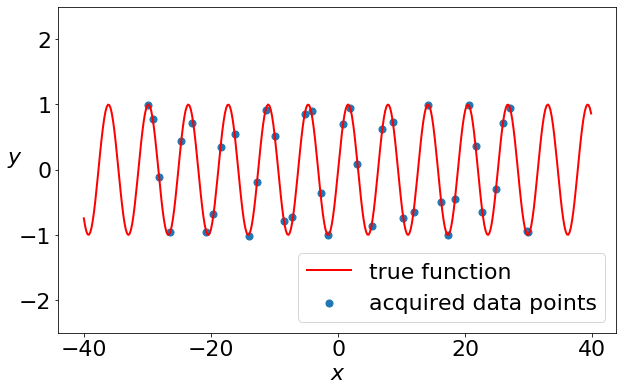

In [21]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)

ax.plot(real_x, real_y, c='r', linewidth=2)
ax.scatter(loop.loop_state.X[:, 0].tolist(), 
           loop.loop_state.Y[:, 0].tolist(), s=50)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$', rotation=None)
ax.set_ylim([-2.5, 2.5])

ax.legend(['true function', 'acquired data points'], loc='lower right')

mlai.write_figure('emukit-sine-function.svg', directory='./uq')

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/uq/emukit-sine-function.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Experimental design in Emukit using the
`ExperimentalDesignLoop`: learning function $\sin(x)$ with Emukit.</i>

Computer the predictions from the Emukit model.

In [22]:
predicted_y = []
predicted_std = []
for x in real_x:
    y, var = emukit_model.predict(np.array([[x]]))
    std = np.sqrt(var)
    predicted_y.append(y)
    predicted_std.append(std)

predicted_y = np.array(predicted_y).flatten()
predicted_std = np.array(predicted_std).flatten()

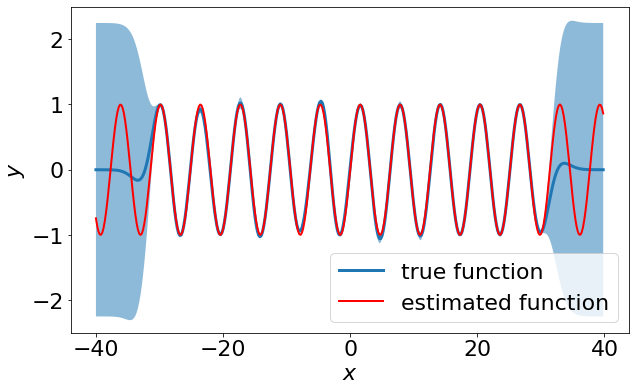

In [23]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)

ax.plot(real_x, predicted_y, linewidth=3)
ax.plot(real_x, real_y, c='r', linewidth=2)

ax.set_ylim([-2.5, 2.5])

ax.fill_between(real_x, predicted_y - 2 * predicted_std, 
                predicted_y + 2 * predicted_std, alpha=.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(['true function', 'estimated function'], loc='lower right')

mlai.write_figure('emukit-sine-function-fit.svg', directory='./uq')

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/uq/emukit-sine-function-fit.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>The fit to the sine function after runnning the Emukit
`ExperimentalDesignLoop`.</i>

### Exercise 2

Repeat the above experiment but using the Gaussian process model from
`sklearn`. You can see step by step instructions on how to do this in
[this
notebook](https://github.com/EmuKit/emukit/blob/master/notebooks/Emukit-tutorial-custom-model.ipynb).

In [24]:
# Write your answer to Exercise 2 here




Emukit Overview Summary
-----------------------

The aim is to provide a suite where different approaches to emulation
are assimilated under one roof. The current version of Emukit includes
*multi-fidelity emulation* for build surrogate models when data is
obtained from multiple information sources that have different fidelity
and/or cost; *Bayesian optimisation* for optimising physical experiments
and tune parameters of machine learning algorithms or other
computational simulations; *experimental design and active learning*:
design the most informative experiments and perform active learning with
machine learning models; *sensitivity analysis*: analyse the influence
of inputs on the outputs of a given system; and *Bayesian quadrature*:
efficiently compute the integrals of functions that are expensive to
evaluate. But it’s easy to extend.

This introduction is based on [An Introduction to Experimental Design
with
Emukit](https://github.com/EmuKit/emukit/blob/master/notebooks/Emukit-tutorial-experimental-design-introduction.ipynb)
written by Andrei Paleyes and Maren Mahsereci.

Alex Forrester
--------------

<svg viewBox="0 0 200 200" style="width:15%">

<defs> <clipPath id="clip0">

<style>
circle {
  fill: black;
}
</style>

<circle cx="100" cy="100" r="100"/> </clipPath> </defs>

<title>

Alex Forrester

</title>

<image preserveAspectRatio="xMinYMin slice" width="100%" xlink:href="../slides/diagrams/people/alex-forrester.jpg" clip-path="url(#clip0)"/>

</svg>

We’re going to make use of the Forrester function in our example below,
a function developed as a demonstrator by [Alex
Forrester](https://www.southampton.ac.uk/engineering/research/groups/performance-sports/staff-profiles/alexander-forrester.page).
Alex is a design engineer who makes extensive use of surrogate modelling
in Engineering design.

You can see Alex talking about the use of Gaussian process surrogates
[in this online video
lecture](http://videolectures.net/mla09_forrester_sbcmoo/).

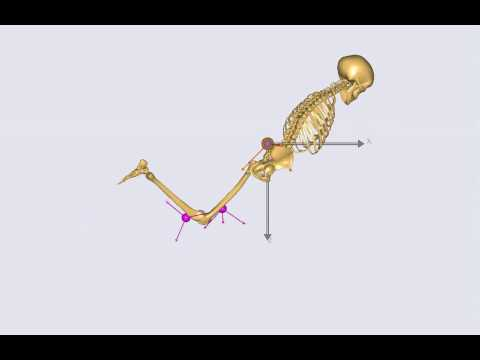

In [25]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('2ngc2aw9xYs')

Figure: <i>A kinematic simulation of the human body doing breaststroke
that Alex uses as part of his work in optimization of human motion
during sports.</i>

The Forrester function (Forrester et al., 2008) is commonly used as a
demonstrator function in surrogate modelling. It has the form $$
f(x) = (6x-2)^2\sin(12 x-4).
$$

In [26]:
import numpy as np

In [27]:
x = np.linspace(0, 1, 100)
f = (6*x-2)**2 * np.sin(12*x-4)

In [28]:
import matplotlib.pyplot as plt
import teaching_plots as plot
import mlai

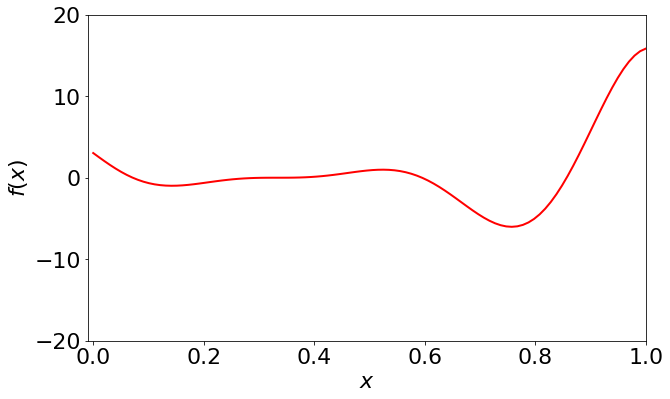

In [29]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
ax.plot(x, f, 'r-', linewidth=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.set_xlim(-0.01, 1)
ax.set_ylim([-20, 20])

mlai.write_figure('forrester-function.svg', directory='./uq')

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/uq/forrester-function.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>The Forrester function is commonly used as an exemplar
function for surrogate modelling and emulation. It has the form
$f(x) = (6x-2)^2\sin(12 x-4)$</i>

Experimental Design in Emukit
=============================

We’re going to introduce the experimental design acquisiton functions by
looking at the Forrester function (Forrester et al., 2008)

In [30]:
import numpy as np

from emukit.test_functions import forrester_function
from emukit.core.loop.user_function import UserFunctionWrapper
from emukit.core import ContinuousParameter, ParameterSpace

In [31]:
target_function, space = forrester_function()

In [32]:
x_plot = np.linspace(space.parameters[0].min, space.parameters[0].max, 301)[:, None]
y_plot = target_function(x_plot)

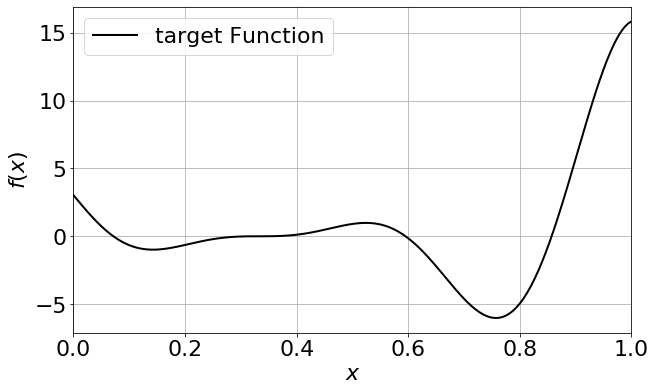

In [33]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
ax.plot(x_plot, y_plot, 'k', label='target Function', linewidth=2)

ax.legend(loc=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.grid(True)
ax.set_xlim(0, 1)

mlai.write_figure(filename='forrester-function.svg', directory='./uq')

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/uq/forrester-function.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>The Forrester function (Forrester et al., 2008).</i>

Initial Design
--------------

Usually, before we start the actual ExpDesign loop we need to gather a
few observations such that we can fit the model. This is called the
initial design and common strategies are either a predefined grid or
sampling points uniformly at random.

In [34]:
X_init = np.array([[0.2],[0.6], [0.9]])
Y_init = target_function(X_init)

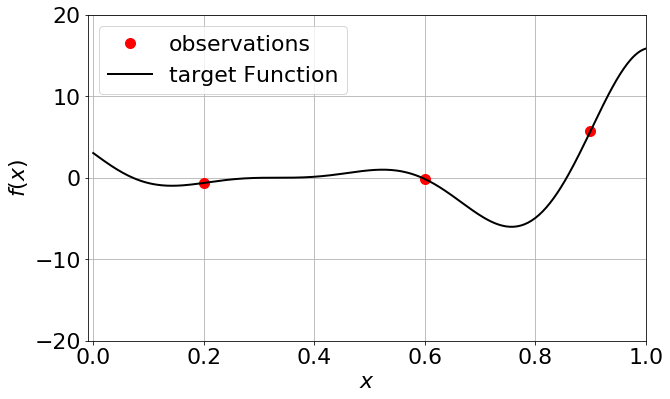

In [35]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
ax.plot(X_init, Y_init, 'ro', markersize=10, label='observations')
ax.plot(x_plot, y_plot, 'k', label='target Function', linewidth=2)

ax.legend(loc=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.grid(True)
ax.set_xlim(-0.01, 1)
ax.set_ylim([-20, 20])

mlai.write_figure(filename='forrester-function-initial-design.svg', directory='./uq')

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/uq/forrester-function-initial-design.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>The initial design for the Forrester function example.</i>

The Model
---------

Now we can start with the ExpDesign loop by first fitting a model on the
collected data. A popular model for ExpDesign is a Gaussian process (GP)
which defines a probability distribution across classes of functions,
typically smooth, such that each linear finite-dimensional restriction
is multivariate Gaussian (Rasmussen and Williams, 2006). Gaussian
processes are fully parametrized by a mean $\mu(\mathbf{ x})$ and a
covariance function $k(\mathbf{ x},\mathbf{ x}^\prime)$. Without loss of
generality $\mu(\mathbf{ x})$ is assumed to be zero. The covariance
function $k(\mathbf{ x},\mathbf{ x}^\prime)$ characterizes the
smoothness and other properties of $f$. It is known that the kernel of
the process has to be continuous, symmetric and positive definite. A
widely used kernel is the exponentiated quadratic or RBF kernel: $$ 
k(\mathbf{ x},\mathbf{ x}^\prime) = \alpha \exp{ \left(-\frac{\|\mathbf{ x}-\mathbf{ x}^\prime\|^2}{2 \ell}\right)} 
$$ where $\alpha$ and $\ell$ are hyperparameters.

To denote that $f$ is a sample from a GP with mean $\mu$ and covariance
$k$ we write $$
f\sim \mathcal{GP}(\mu,k).
$$

For regression tasks, the most important feature of GPs is that process
priors are conjugate to the likelihood from finitely many observations
$\mathbf{Y}= (y_1,\dots,y_n)^\top$ and
$\mathbf{X}=\{\mathbf{ x}_1,\dots,\mathbf{ x}_n\}$,
$\mathbf{ x}_i\in \mathcal{X}$ of the form
$y_i = f(\mathbf{ x}_i) + \epsilon_i$ where
$\epsilon_i \sim \mathcal{N}\left(0,\sigma^2\right)$ and we typically
estimate $\sigma^2$ by maximum likelihood alongside $\alpha$ and $\ell$.

We obtain the Gaussian posterior $$
f(\mathbf{ x}^*)|\mathbf{X}, \mathbf{Y}, \theta \sim \mathcal{N}\left(\mu(\mathbf{ x}^*),\sigma^2(\mathbf{ x}^*)\right),
$$ where $\mu(\mathbf{ x}^*)$ and $\sigma^2(\mathbf{ x}^*)$ have a
closed form solution as we’ve seen in the earlier lectures (see also
Rasmussen and Williams (2006)).

Note that Gaussian processes are also characterized by hyperparameters,
for example in the exponentiated quadratic case we have
$\boldsymbol{ \theta}= \left\{ \alpha, \ell, \sigma^2 \right\}$ for the
scale of the covariance, the lengthscale and the noise variance. Here,
for simplicitly we will keep these hyperparameters fixed. However, we
will usually either optimize or sample these hyperparameters using the
marginal loglikelihood of the GP.

In this module we’ve focussed on Gaussian processes, but we could also
use any other model that returns a mean $\mu(\mathbf{ x})$ and variance
$\sigma^2(\mathbf{ x})$ on an arbitrary input points $\mathbf{ x}$ such
as Bayesian neural networks or random forests. In Emukit these different
models can also be used by defining a new `ModelWrapper`.

Here we’re going to wrap a GPy model.

In [36]:
import GPy
from emukit.model_wrappers.gpy_model_wrappers import GPyModelWrapper

Now we set up the covariance function for the GPy model, initialising it
with a lengthscale, $\ell=0.08$, and a variance, $\alpha=20$.

In [37]:
kern = GPy.kern.RBF(1, lengthscale=0.08, variance=20)
gpy_model = GPy.models.GPRegression(X_init, Y_init, kern, noise_var=1e-10)
emukit_model = GPyModelWrapper(gpy_model)

mu_plot, var_plot = emukit_model.predict(x_plot)

In [38]:
import matplotlib.pyplot as plt

from matplotlib import colors as mcolors
from matplotlib import cm

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

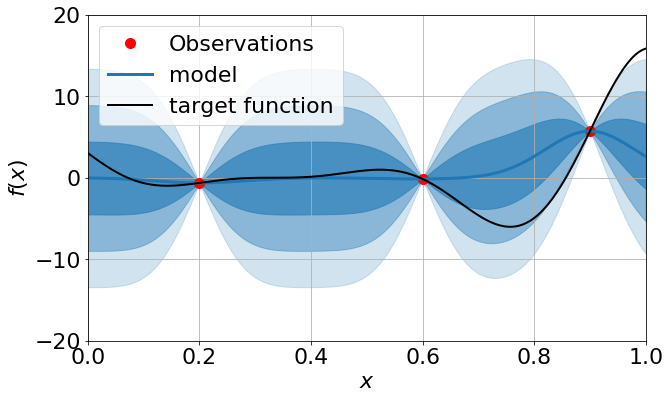

In [39]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
ax.plot(X_init, Y_init, 'ro', markersize=10, label='Observations')
ax.plot(x_plot, mu_plot, 'C0', label='model', linewidth=3)
ax.plot(x_plot, y_plot, 'k', label='target function', linewidth=2)
ax.fill_between(x_plot[:, 0],
                 mu_plot[:, 0] + np.sqrt(var_plot)[:, 0],
                 mu_plot[:, 0] - np.sqrt(var_plot)[:, 0], color='C0', alpha=0.6)
ax.fill_between(x_plot[:, 0],
                 mu_plot[:, 0] + 2 * np.sqrt(var_plot)[:, 0],
                 mu_plot[:, 0] - 2 * np.sqrt(var_plot)[:, 0], color='C0', alpha=0.4)
ax.fill_between(x_plot[:, 0],
                 mu_plot[:, 0] + 3 * np.sqrt(var_plot)[:, 0],
                 mu_plot[:, 0] - 3 * np.sqrt(var_plot)[:, 0], color='C0', alpha=0.2)
ax.legend(loc=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.set_ylim([-20, 20])
ax.grid(True)
ax.set_xlim(0, 1)

mlai.write_figure(filename='forrester-function-multi-errorbars-00.svg', directory='./uq')

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/uq/forrester-function-multi-errorbars-00.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>The emulator fitted to the Forrester function with only three
observations from the inital design. The error bars show 1, 2 and 3
standard deviations.</i>

The Acquisition Function
------------------------

In the second step of our ExpDesign loop we use our model to compute the
acquisition function. We’ll review two different forms of acquisition
funciton for doing this.

### Uncertainty Sampling

In uncertainty sampling (US) we hoose the next value $\mathbf{ x}_{n+1}$
at the location where the model on $f(\mathbf{ x})$ has the highest
marginal predictive variance $$
a_{US}(\mathbf{ x}) = \sigma^2(\mathbf{ x}).
$$ This makes sure, that we learn the function $f(\cdot)$ everywhere on
$\mathbb{X}$ to a similar level of absolute error.

### Integrated Variance Reduction

In the integrated variance reduction (IVR) you choose the next value
$\mathbf{ x}_{n+1}$ such that the total variance of the model is reduced
maximally (Sacks et al., 1989), $$
\begin{align*}
a_{IVR} & = \int_{\mathbb{X}}[\sigma^2(\mathbf{ x}') - \sigma^2(\mathbf{ x}'; \mathbf{ x})]\text{d}\mathbf{ x}' \\
& \approx 
\frac{1}{\# \text{samples}}\sum_i^{\# \text{samples}}[\sigma^2(\mathbf{ x}_i) - \sigma^2(\mathbf{ x}_i; \mathbf{ x})].
\end{align*}
$$ Here $\sigma^2(\mathbf{ x}'; \mathbf{ x})$ is the predictive variance
at $\mathbf{ x}'$ had $\mathbf{ x}$ been observed. Thus IVR computes the
overall reduction in variance (for all points in $\mathbb{X}$) had $f$
been observed at $\mathbf{ x}$.

The finite sum approximation on the right hand side of the equation is
usually used because the integral over $\mathbf{ x}'$ is not analytic.
In that case $\mathbf{ x}_i$ are sampled randomly. For a GP model the
right hand side simplifies to

$$
a_{LCB} \approx \frac{1}{\# \text{samples}}\sum_i^{\# \text{samples}}\frac{k^2(\mathbf{ x}_i, \mathbf{ x})}{\sigma^2(\mathbf{ x})}.
$$

IVR is arguably the more principled approach, but often US is preferred
over IVR simply because it lends itself to gradient based optimization
more easily, is cheaper to compute, and is exact.

For both of them (stochastic) gradient base optimizers are used to
retrieve
$\mathbf{ x}_{n+1} \in \operatorname*{arg\:max}_{\mathbf{ x}\in \mathbb{X}} a(\mathbf{ x})$.

In [40]:
from emukit.experimental_design.acquisitions import IntegratedVarianceReduction, ModelVariance

In [41]:
us_acquisition = ModelVariance(emukit_model)
ivr_acquisition = IntegratedVarianceReduction(emukit_model, space)

us_plot = us_acquisition.evaluate(x_plot)
ivr_plot = ivr_acquisition.evaluate(x_plot)

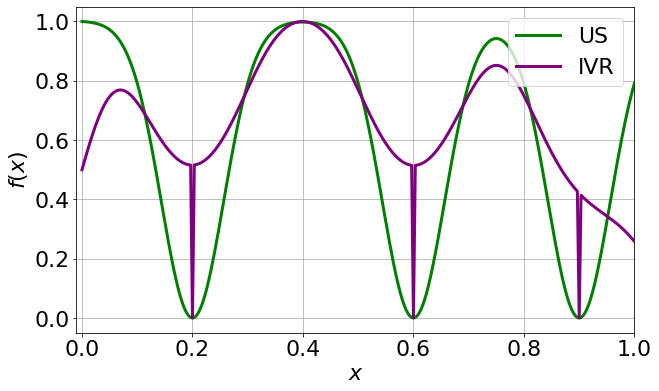

In [42]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
ax.plot(x_plot, us_plot / np.max(us_plot), 'green', label='US', linewidth=3)
ax.plot(x_plot, ivr_plot / np.max(ivr_plot) , 'purple', label='IVR', linewidth=3)

ax.legend(loc=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.grid(True)
ax.set_xlim(-0.01, 1)

mlai.write_figure('experimental-design-acquisition-forrester-00.svg', directory='./uq')

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/uq/experimental-design-acquisition-forrester-00.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>The *uncertainty sampling* and *integrated variance
reduction* acquisition functions for the Forrester example.</i>

Evaluating the objective function
---------------------------------

To find the next point to evaluate we optimize the acquisition function
using a standard gradient descent optimizer.

In [43]:
from emukit.core.optimization import GradientAcquisitionOptimizer

In [44]:
optimizer = GradientAcquisitionOptimizer(space)
x_new, _ = optimizer.optimize(us_acquisition)

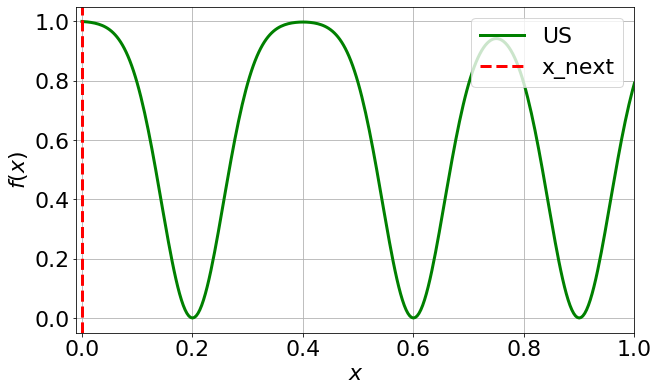

In [45]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
ax.plot(x_plot, us_plot / np.max(us_plot), 'green', label='US', linewidth=3)
ax.axvline(x_new, color='red', label='x_next', linestyle='--', linewidth=3)
ax.legend(loc=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.grid(True)
ax.set_xlim(-0.01, 1)

mlai.write_figure('experimental-design-acquisition-forrester-01.svg', directory='./uq')

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/uq/experimental-design-acquisition-forrester-02.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>The maxima of the acquisition function is found and this
point is selected for inclusion.</i>

Afterwards we evaluate the true objective function and append it to our
initial observations.

In [46]:
y_new = target_function(x_new)

In [47]:
X = np.append(X_init, x_new, axis=0)
Y = np.append(Y_init, y_new, axis=0)

After updating the model, you can see that the uncertainty about the
true objective function in this region decreases and our model becomes
more certain.

In [48]:
emukit_model.set_data(X, Y)
mu_plot, var_plot = emukit_model.predict(x_plot)

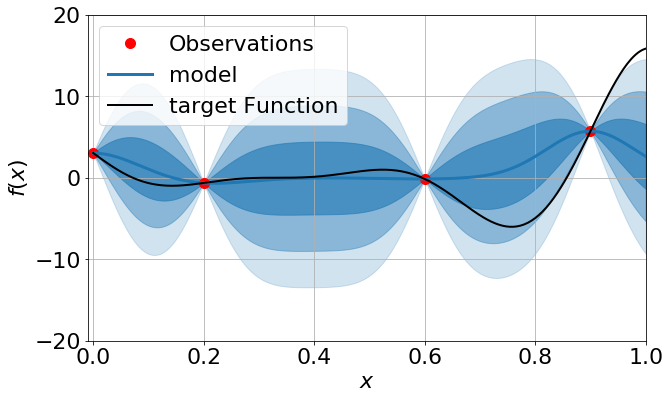

In [49]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
ax.plot(emukit_model.X, emukit_model.Y, 'ro', markersize=10, label='Observations')
ax.plot(x_plot, mu_plot, 'C0', label='model', linewidth=3)
ax.plot(x_plot, y_plot, 'k', label='target Function', linewidth=2)
ax.fill_between(x_plot[:, 0],
                 mu_plot[:, 0] + np.sqrt(var_plot)[:, 0],
                 mu_plot[:, 0] - np.sqrt(var_plot)[:, 0], color='C0', alpha=0.6)
ax.fill_between(x_plot[:, 0],
                 mu_plot[:, 0] + 2 * np.sqrt(var_plot)[:, 0],
                 mu_plot[:, 0] - 2 * np.sqrt(var_plot)[:, 0], color='C0', alpha=0.4)
ax.fill_between(x_plot[:, 0],
                 mu_plot[:, 0] + 3 * np.sqrt(var_plot)[:, 0],
                 mu_plot[:, 0] - 3 * np.sqrt(var_plot)[:, 0], color='C0', alpha=0.2)
ax.legend(loc=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.grid(True)
ax.set_xlim(-0.01, 1)
ax.set_ylim([-20, 20])


mlai.write_figure(filename='forrester-function-multi-errorbars-01.svg', directory='./uq')

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/uq/forrester-function-multi-errorbars-01.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>The target Forrester function plotted alongside the emulation
model and error bars from the emulation at 1, 2 and 3 standard
deviations.</i>

We can repeat this process to obtain more points.

In [50]:
us_acquisition = ModelVariance(emukit_model)
us_plot = us_acquisition.evaluate(x_plot)
x_new, _ = optimizer.optimize(us_acquisition)

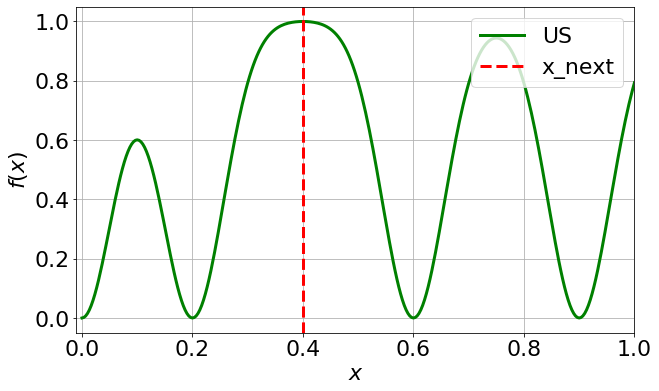

In [51]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
ax.plot(x_plot, us_plot / np.max(us_plot), 'green', label='US', linewidth=3)
ax.axvline(x_new, color='red', label='x_next', linestyle='--', linewidth=3)
ax.legend(loc=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.grid(True)
ax.set_xlim(-0.01, 1)

mlai.write_figure('experimental-design-acquisition-forrester-02.svg', directory='./uq')

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/uq/experimental-design-acquisition-forrester-02.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>The maxima of the acquisition function is found and this
point is selected for inclusion.</i>

Once again we can asimmilate the new target function observation into
the model and re-evaluate our emulation.

In [52]:
y_new = target_function(x_new)
X = np.append(X, x_new, axis=0)
Y = np.append(Y, y_new, axis=0)
emukit_model.set_data(X, Y)
mu_plot, var_plot = emukit_model.predict(x_plot)

Resulting in an updated estimate of the function.

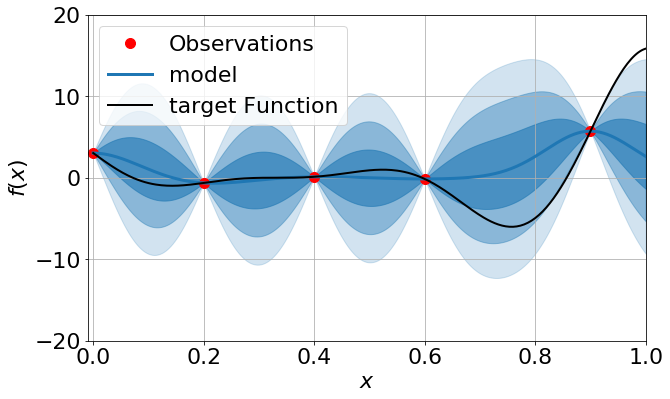

In [53]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
ax.plot(emukit_model.X, emukit_model.Y, 'ro', markersize=10, label='Observations')
ax.plot(x_plot, mu_plot, 'C0', label='model', linewidth=3)
ax.plot(x_plot, y_plot, 'k', label='target Function', linewidth=2)
ax.fill_between(x_plot[:, 0],
                 mu_plot[:, 0] + np.sqrt(var_plot)[:, 0],
                 mu_plot[:, 0] - np.sqrt(var_plot)[:, 0], color='C0', alpha=0.6)
ax.fill_between(x_plot[:, 0],
                 mu_plot[:, 0] + 2 * np.sqrt(var_plot)[:, 0],
                 mu_plot[:, 0] - 2 * np.sqrt(var_plot)[:, 0], color='C0', alpha=0.4)
ax.fill_between(x_plot[:, 0],
                 mu_plot[:, 0] + 3 * np.sqrt(var_plot)[:, 0],
                 mu_plot[:, 0] - 3 * np.sqrt(var_plot)[:, 0], color='C0', alpha=0.2)
ax.legend(loc=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.grid(True)
ax.set_xlim(-0.01, 1)
ax.set_ylim([-20, 20])


mlai.write_figure(filename='forrester-function-multi-errorbars-02.svg', directory='./uq')

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/uq/forrester-function-multi-errorbars-02.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>The target Forrester function plotted alongside the emulation
model and error bars from the emulation at 1, 2 and 3 standard
deviations.</i>

Emukit’s experimental design interface
--------------------------------------

Of course in practice we don’t want to implement all of these steps our
self. Emukit provides a convenient and flexible interface to apply
experimental design. Below we can see how to run experimental design on
the exact same function for 10 iterations.

In [54]:
from emukit.experimental_design.experimental_design_loop import ExperimentalDesignLoop

In [55]:
ed = ExperimentalDesignLoop(space=space, model=emukit_model)

ed.run_loop(target_function, 10)

Optimization restart 1/1, f = 12.429230120309304
Optimization restart 1/1, f = 16.211545976696232
Optimization restart 1/1, f = 22.7997370008135
Optimization restart 1/1, f = 24.98645369939047
Optimization restart 1/1, f = 26.10302759355788
Optimization restart 1/1, f = 26.188080919184017
Optimization restart 1/1, f = 27.190109347291546
Optimization restart 1/1, f = 25.957580845309813
Optimization restart 1/1, f = 28.04907992850626
Optimization restart 1/1, f = 24.02914298533008


 /Users/neil/anaconda3/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 1/1, f = 18.07642972578386


In [56]:
mu_plot, var_plot = ed.model.predict(x_plot)

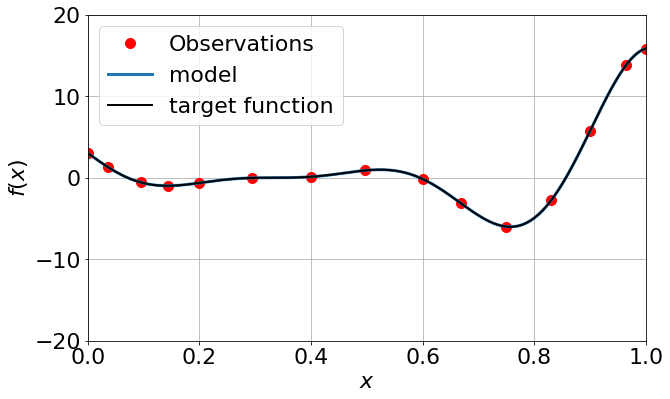

In [57]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
ax.plot(ed.loop_state.X, ed.loop_state.Y, 'ro', markersize=10, label='Observations')
ax.plot(x_plot, mu_plot, 'C0', label='model', linewidth=3)
ax.plot(x_plot, y_plot, 'k', label='target function', linewidth=2)
ax.fill_between(x_plot[:, 0],
                 mu_plot[:, 0] + np.sqrt(var_plot)[:, 0],
                 mu_plot[:, 0] - np.sqrt(var_plot)[:, 0], 
                 color='C0', alpha=0.6)

ax.fill_between(x_plot[:, 0],
                 mu_plot[:, 0] + 2 * np.sqrt(var_plot)[:, 0],
                 mu_plot[:, 0] - 2 * np.sqrt(var_plot)[:, 0], 
                 color='C0', alpha=0.4)

ax.fill_between(x_plot[:, 0],
                 mu_plot[:, 0] + 3 * np.sqrt(var_plot)[:, 0],
                 mu_plot[:, 0] - 3 * np.sqrt(var_plot)[:, 0], 
                 color='C0', alpha=0.2)
ax.legend(loc=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.grid(True)
ax.set_xlim(0, 1)
ax.set_ylim([-20, 20])


mlai.write_figure(filename='forrester-function-full-fit.svg', directory='./uq')

<img src="http://inverseprobability.com/talks/slides/../slides/diagrams/uq/forrester-function-full-fit.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>The fit of the model to the Forrester function.</i>

Conclusions
-----------

We’ve introduced the Emukit software and outlined its design philosophy.
We’ve then performed some simple examples using Emukit to perform
*experimental design* as a task. In particular we saw how we could
define the task as an acquisition funciton, a loop, an emulator model
and a target function.

You can compare the design of this software with its predecessor,
`GPyOpt`, which is less modular in its design, and more focussed on
Bayesian optimization.

Thanks!
-------

For more information on these subjects and more you might want to check
the following resources.

-   twitter: [@lawrennd](https://twitter.com/lawrennd)
-   podcast: [The Talking Machines](http://thetalkingmachines.com)
-   newspaper: [Guardian Profile
    Page](http://www.theguardian.com/profile/neil-lawrence)
-   blog:
    [http://inverseprobability.com](http://inverseprobability.com/blog.html)

References
----------

Forrester, A.I.J., Sóbester, A., Keane, A.J., 2008. Engineering design
via surrogate modelling: A practical guide. wiley.
<https://doi.org/10.1002/9780470770801>

Rasmussen, C.E., Williams, C.K.I., 2006. Gaussian processes for machine
learning. mit, Cambridge, MA.

Sacks, J., Welch, W.J., Mitchell, T.J., Wynn, H.P., 1989. Design and
analysis of computer experiments. Statistical Science 4, 409–423.
<https://doi.org/10.1214/ss/1177012413>